# Cálculo de una cercha simple

Resolver la estructura de la figura:

<img src='img/ret4b(a).png' width=500>

## 1. Modelo analítico

Para la carga de datos es suficiente con definir el sistema de coordenadas global y enumerar nudos y barras.

Se recomienda la siguiente convención (opcional):
- Enumerar nudos de abajo hacia arriba y de izquierda a derecha;
- Enumerar barras de abajo hacia arriba y de izquierda a derecha, primero horizontales, luego verticales y por último el resto.

<img src='img/ret4b(a)-nyb.png' width=500>

Una vez definida la estructura con sus restricciones de apoyo, el sistema automáticamente considerará la siguiente enumeración de grados de libertad y orientación de las barras:

<img src='img/ret4b(a)-enum.png' width=500>

## 2. Librerías

In [1]:
# Ubicación de la carpeta *struktura*
import sys
sys.path.append(r"C:\Users\fgrv\OneDrive\Documentos\PythonProjects\struktura")

import analisa.edeb as edb

## 3. Datos

Las unidades deben ser coherentes, en este ejemplo usamos Fuerzas en $kN$ y distancias en $m$.

### 3.1 Nudos

In [2]:
# Coordenadas de los nudos, en el orden de enumeración
coords = [(0, 0), (3, 0), (7, 0), (3, 4)]

# Restricciones {#nudo: (restX, restY), ...}
rest = {0: (1, 1), 1: (1, 1), 2: (0, 1)}

# Cargas nodales {#nudo: (Px, Py), ...}
cargas = {3: (-8, -10)}

### 3.2 Barras

In [3]:
# Áreas y módulos de elasticidad
A1 = 50*(1e-2)**2  # 50 cm2 a m2
A2 = 35*(1e-2)**2 # 35 cm2 a m2
E = 200e6  # kN/m2 = kPa

In [4]:
# Instanciones de la clase Seccion
s1 = edb.Seccion(area=A1)
s2 = edb.Seccion(area=A2)

# Si hay más de una sección, se debe hacer una lista
s = [s1, s2]  # lista de secciones

# Instanciación de la clase Material
# Si hay más de un tipo de material, se debe hacer una lista.
# En este caso, hay un solo material
m1 = edb.Material(elast_long=E)

La **tabla de conectividad** debe tener los siguientes datos (por cada barra):
1. Número del nudo inicial.
    - Se recomienda que el número de nudo inicial sea el de menor valor numérico, por ejemplo, si los extremos de la barra en cuestión corresponden a los nudos 3 y 7, el nudo inicial debería ser 3 y el final 7.
2. Número del nudo final
3. Número de material (de la lista de materiales), el conteo inicia en 0, el primero de la lista es 0, el segundo 1, etc. Si hay un solo tipo de material, se coloca 0.
4. Número de sección, de la lista de secciones, el conteo inicia en 0, el primero es 0, el segundo 1, etc. Si hay un solo tipo de sección, se coloca 0.

El diccionario de la tabla de conectividad debe tener la siguiente estructura:

 - La tabla de conectividad delimitada entre llaves, los datos de cada barra delimitados entre paréntesis. Los datos y los paréntesis deben estar separados con comas.

- Ejemplo: 
    - tabla_de_conectividad = {(#nudo_inicial, #nudo_final, #material, #sección), ...}

en donde '#' se lee 'número de', es decir se tienen cuatro valores para cada barra.

Si el material y la sección son constantes para toda la estructura, pueden obviarse y escribir la tabla de conectividad con solo los valores numéricos del nudo inicial y final, es decir:
- tabla_de_conecividad_con_unico_material_y_seccion = {(#nudo_inical, #nudo_final), ...}


In [5]:
# Tabla de conectividad de las barras en el orden de enumeración
# Formato: [(#nudo_inicial, #nudo_final, num_de_material, num_de_seccion), ...]
conect = [(1, 2, 0, 0), (0, 3, 0, 1), (1, 3, 0, 1), (2, 3, 0, 0)]

## 4. Procesamiento

### 4.1 Preliminar

In [6]:
# Instanciación de la clase Reticulado
st = edb.Reticulado(datos_nudos=coords, restricciones=rest, datos_barras=conect,
                   materiales=m1, secciones=s, cargas_nodales=cargas)

### 4.2 Dibujo de la estructura para revisión

Con sus respectivas asignaciones numéricas.

Respecto a los apoyos:
- Triángulos en negro para los apoyos con restricción completa
- Triángulos en colores para apoyos con restricción parcial;
- Círculos para nudos sin restricciones.

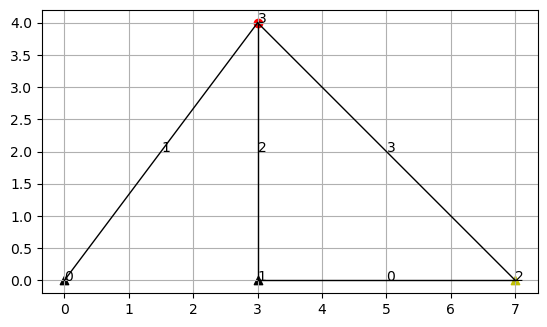

In [7]:
st.dibujar_nudos(num=True)
st.dibujar_barras(num=True)

### 4.3 Realización de los cálculos

In [8]:
# Cálculos
st.procesamiento()

## 5. Resultados

### 5.1 Valores de barras individuales que podrían interesar

In [9]:
# Tensión en la barra 2
b2 = st.barras()[1]
b2.tension()

-2605.0073703443227

In [10]:
# Elongación de la barra 3
b3 = st.barras()[2]
b3.elongacion()

-2.991693648750183e-05

In [11]:
# Matriz de rigidez local de la barra 2
b2.rigidez_local

array([[ 140000.,       0., -140000.,       0.],
       [      0.,       0.,       0.,       0.],
       [-140000.,      -0.,  140000.,      -0.],
       [      0.,       0.,       0.,       0.]])

In [12]:
# Matriz de transformación de coordenadas de la barra 4
b4 = st.barras()[3]
b4.transf_coord()

array([[-0.70710678,  0.70710678,  0.        ,  0.        ],
       [-0.70710678, -0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.70710678,  0.70710678],
       [ 0.        ,  0.        , -0.70710678, -0.70710678]])

In [13]:
# Matriz de rigidez global de la barra 4
b4.rigidez_global

array([[ 88388.34764832, -88388.34764832, -88388.34764832,
         88388.34764832],
       [-88388.34764832,  88388.34764832,  88388.34764832,
        -88388.34764832],
       [-88388.34764832,  88388.34764832,  88388.34764832,
        -88388.34764832],
       [ 88388.34764832, -88388.34764832, -88388.34764832,
         88388.34764832]])

In [14]:
# Vector de desplazamientos en coordenadas globales de la barra 2
b2.desplaz_global()

array([ 0.00000000e+00,  0.00000000e+00, -6.86527251e-05, -2.99169365e-05])

In [15]:
# Densidad de la barra 2
b2.material.densidad

7850.0

### 5.2 Valores nodales que podrían interesar

In [16]:
# Enumeración de grados de libertad del nudo 2
n2 = st.nudos()[1]
n2.gdl()

(5, 6)

In [17]:
# Cargas externas en el nudo 4
n4 = st.nudos()[3]
n4.cargas()

array([ -8, -10])

In [18]:
# Desplazamiento del nudo 3
n3 = st.nudos()[2]
n3.desplaz()

array([-1.01179381e-05,  0.00000000e+00])

In [19]:
# Coordenadas iniciales del nudo 3
n3.coord

(7, 0)

In [20]:
# Coordenadas finales del nudo 4
n4.posicion()

array([2.99993135, 3.99997008])

### 5.3 Resultados de la estructura global

In [21]:
# Desplazamientos en los grados de libertad
st.desplaz_gdl()

array([-1.01179381e-05, -6.86527251e-05, -2.99169365e-05])

In [22]:
# Tensiones de las barras en orden de enumeración
st.tensiones()

array([ -505.89690446, -2605.00737034, -1495.84682438,   715.44626344])

In [23]:
# Deformaciones axiales de las barras en orden de enumeración
st.elongaciones()

array([-1.01179381e-05, -6.51251843e-05, -2.99169365e-05,  2.02358762e-05])

In [24]:
# Reacciones en los grados de restricción
st.reacciones()

array([ 5.47051548,  7.29402064,  2.52948452,  5.23546389, -2.52948452])

### 5.4 Gráfico de la deformada

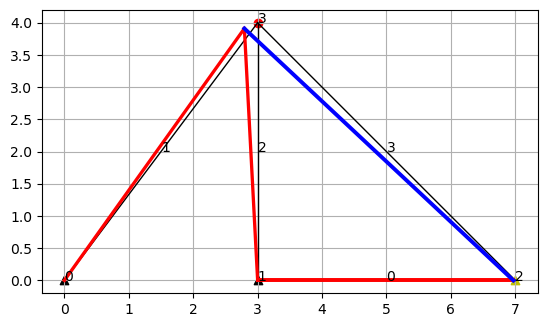

In [25]:
# Estructura sin aplicación de las cargas. Enumera las barras.
st.dibujar_barras(num=True)

# Nudos enumerados y en sus posiciones iniciales
# Triángulos para los apoyos
st.dibujar_nudos(num=True)

# Deformada amplificada. Azul: tracción; Rojo: compresión
st.dibujar_deform(amp=3000, colorear=True, espesor_area=20)